In [1]:
import pandas as pd

In [2]:
folder = "repos"

with open("repos.txt") as fil:
    all_repos=fil.readlines()

In [3]:
all_repos = [x.replace("\n","").replace("/","-") for x in all_repos]


In [4]:
import os
BASE_DIR = os.getcwd()


In [5]:

filename=BASE_DIR+"/"+folder+"/"+all_repos[0]+".csv"
df = pd.read_csv(filename)

df = df.drop(df.columns[0], axis=1)
df


,commit_author,commit_date
0,simminu,2021-10-05T08:02:27Z
1,simminu,2021-10-05T08:02:05Z
2,simminu,2021-10-05T07:57:46Z
3,simminu,2021-10-05T07:51:17Z
4,simminu,2021-10-05T07:44:54Z
5,simminu,2021-10-01T12:06:38Z
6,simminu,2021-09-23T06:03:48Z
7,simminu,2021-09-22T17:50:25Z
8,simminu,2021-09-22T17:48:44Z
9,simminu,2021-09-22T17:46:13Z


In [6]:
from os.path import exists

for repo in all_repos[1:]:
    filename=BASE_DIR+"/"+folder+"/"+repo+".csv"
    if exists(filename):
        tmp_df = pd.read_csv(filename)
        tmp_df = tmp_df.drop(tmp_df.columns[0], axis=1)
        df = pd.concat([df,tmp_df] )



In [7]:
df["commit_date"] = pd.to_datetime(df["commit_date"]) 

In [8]:
df = df.set_index("commit_date")
df = df.rename(columns={"commit_author":"commits"})
df.head()

,commits
commit_date,
2021-10-05 08:02:27+00:00,simminu
2021-10-05 08:02:05+00:00,simminu
2021-10-05 07:57:46+00:00,simminu
2021-10-05 07:51:17+00:00,simminu
2021-10-05 07:44:54+00:00,simminu


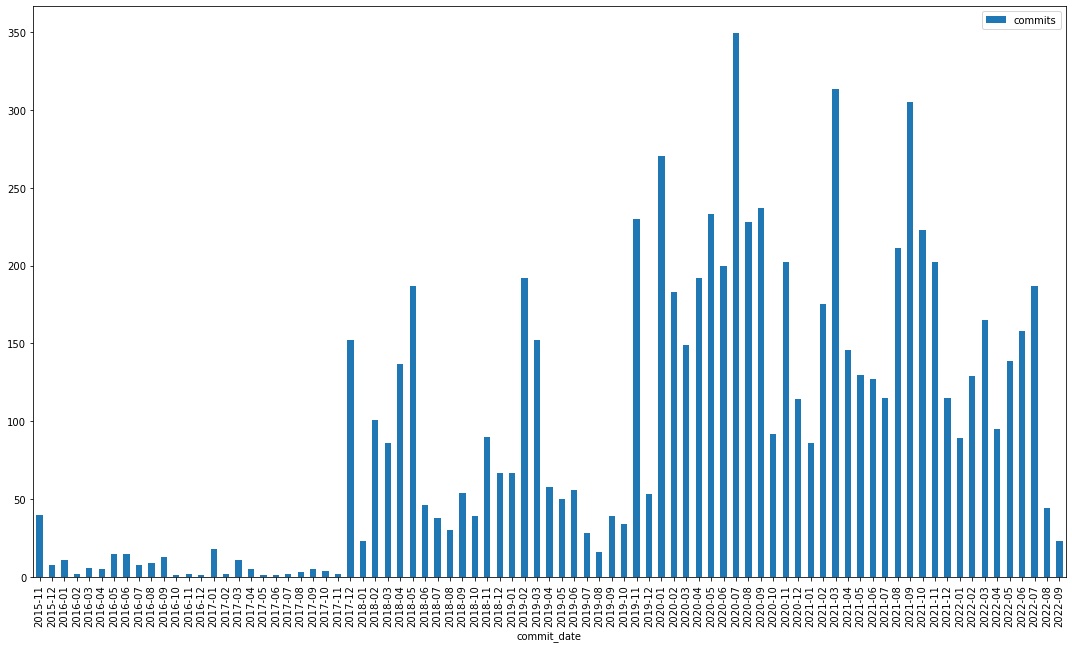

In [9]:
import matplotlib.pyplot as plt
from datetime import datetime

resampled = df.resample("MS").count()


ax = resampled.plot(kind="bar")
locs, labels=plt.xticks()

ax.set_xticks(locs,[datetime.strftime(x,"%Y-%m") for x in list(resampled.index)])

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()